<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**
2. **[Random forest](#rf)**

**Import the required libraries**

In [44]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from sklearn.model_selection import train_test_split
import random
# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

#### Load the csv file

In [45]:
# type your code here
df_employee= pd.read_csv('emp_attrition.csv')
df_employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [46]:
df_employee.describe()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.0,1580.000000
mean,34.339241,9.743671,2.648734,2.660127,1.705696,2.668354,4957.425949,2.470886,13.942405,3.0,5.206329
std,8.828037,8.227881,1.107876,0.755176,0.800629,1.105636,3059.158533,2.232193,2.425033,0.0,3.949229
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.0,0.000000
25%,28.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2571.750000,1.000000,12.000000,3.0,2.000000
50%,33.000000,8.000000,3.000000,3.000000,2.000000,3.000000,4148.000000,1.000000,13.000000,3.0,5.000000
75%,39.000000,16.000000,4.000000,3.000000,2.000000,4.000000,6397.000000,4.000000,16.000000,3.0,8.000000
max,60.000000,29.000000,4.000000,4.000000,4.000000,4.000000,16555.000000,8.000000,19.000000,3.0,18.000000


In [47]:
df_employee.shape

(1580, 18)

In [48]:
df_employee.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
YearsAtCompany             0
dtype: int64

### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
Q1 = df_employee.quantile(0.25)
Q3 = df_employee.quantile(0.75)
IQR = Q3 - Q1
df_employee = df_employee[~((df_employee < (Q1 - 1.5 * IQR)) | (df_employee > (Q3 + 1.5 * IQR))).any(axis=1)]
df_employee = df_employee.reset_index(drop=True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
df_target = df_employee['Attrition']
df_feature = df_employee.drop('Attrition', axis = 1)

In [51]:
for i in range(len(df_target)):
    if df_target[i] == 'Yes':
        df_target[i] = 1
    else:
        df_target[i] = 0
df_target = df_target.astype('int')
df_target.head(5)

0    1
1    1
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [52]:
# df_target=df_target.replace({'Yes':1,'No':0} )
# df_target.head(5)
# from sklearn.tree import DecisionTreeClassifier

In [53]:
df_num = df_feature.select_dtypes(include = [np.number])
df_cat = df_feature.select_dtypes(include = [np.object])

dummy_var = pd.get_dummies(data = df_cat, drop_first = True)
X = pd.concat([df_num, dummy_var], axis = 1)


In [54]:
X.shape

(1487, 30)

In [55]:
X_subset = X.iloc[:,[2,6]]
X_train, X_test, y_train, y_test = train_test_split(X_subset, df_target, random_state = 10, test_size = 0.3)
decision_tree = DecisionTreeClassifier(random_state=10)
decision_tree = decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print("Test_Accuracy:",accuracy_score(y_test, y_pred))

Test_Accuracy: 0.8568232662192393


In [56]:
# X_subset = X.iloc[:,[2,6]]
# X_train, X_test, y_train, y_test = train_test_split(X_subset, df_target, random_state = 10, test_size = 0.3)
# decision_tree = DecisionTreeClassifier(random_state=10)
# decision_tree = decision_tree.fit(X_train, y_train)
# y_pred = decision_tree.predict(X_test)
# print("Test_Accuracy:",accuracy_score(y_train, y_pred))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)
decision_tree_full = DecisionTreeClassifier(random_state=10)
decision_tree_full = decision_tree_full.fit(X_train, y_train)
y_pred_full = decision_tree_full.predict(X_test)

y_pred = decision_tree_full.predict(X_test)
y_pred_train=decision_tree_full.predict(X_train)
print("Training_Accuracy:",accuracy_score(y_train, y_pred_train))

Training_Accuracy: 1.0


In [58]:
decision_tree_full.feature_importances_

array([0.15008056, 0.09700094, 0.0432523 , 0.06569016, 0.02052816,
       0.04851383, 0.13409739, 0.05839482, 0.05993544, 0.        ,
       0.06878681, 0.01566041, 0.00827245, 0.        , 0.01023154,
       0.01393377, 0.00316012, 0.00332747, 0.00614035, 0.02870467,
       0.01698771, 0.        , 0.00797013, 0.        , 0.0123996 ,
       0.        , 0.01394854, 0.01767255, 0.02677792, 0.06853235])

In [59]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': decision_tree_full.feature_importances_})

# print the dataframe
important_features.sort_values(by='Importance', ascending=False)

,Features,Importance
0,Age,0.150081
6,MonthlyIncome,0.134097
1,DistanceFromHome,0.097001
10,YearsAtCompany,0.068787
29,OverTime_Yes,0.068532
3,JobInvolvement,0.065690
8,PercentSalaryHike,0.059935
7,NumCompaniesWorked,0.058395
5,JobSatisfaction,0.048514
2,EnvironmentSatisfaction,0.043252


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

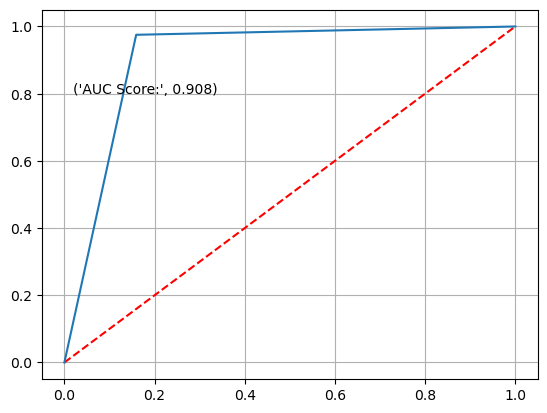

In [60]:
# type your code here
fpr, tpr, thresholds = roc_curve(y_test, y_pred_full)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_full),4)))
                               
# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot a confusion matrix for the full model built in Q3.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

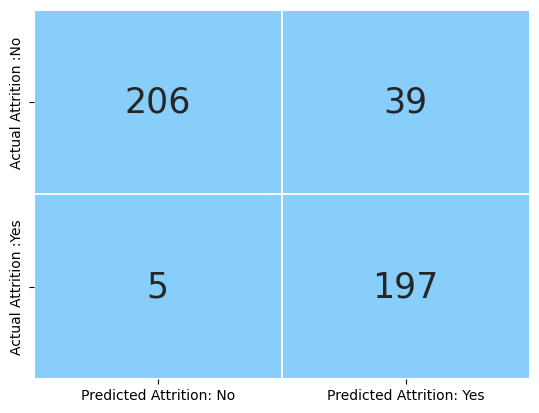

In [61]:
# type your code here
cm = confusion_matrix(y_test, y_pred_full)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Attrition: No','Predicted Attrition: Yes'], 
                           index = ['Actual Attrition :No','Actual Attrition :Yes'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 10)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)

# display the plot
plt.show()

In [62]:
# correctly classifued
(206+197)/(447)

0.901565995525727

In [63]:
# incorrectly classifued
44/447

0.09843400447427293

In [64]:
# specificity
206/(206+39)

0.8408163265306122

In [65]:
# sensitivity
197/(197+5)

0.9752475247524752

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
# True Negative from confusion matrix
TN = cm[0][0]
# True Positive from confusion matrix
TP = cm[1][1]
# False Positive from confusion matrix
FP = cm[0][1]
# False Negative from confusion matrix
FN = cm[1][0]

# add all the values of a confusion matrix
total = TN + TP + FP + FN
# find the percentage of correctly classified observations
# round the result upto 2 decimal points
correct_classified_percentage = ((TN+TP)/total)*100
print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2))

# find the percentage of  misclassified observations
# round the result upto 2 decimal points
misclassified_percentage = ((FP+FN)/total)*100
print("Percentage of misclassified observations: ", round(misclassified_percentage, 2))

# find the specificity
# round the result upto 4 decimal points
specificity = TN/(TN+FP)
print("\nSpecificity: ", round(specificity, 4))

# find the sensitivity
# round the result upto 4 decimal points
sensitivity = TP/(TP+FN)
print("Sensitivity: ", round(sensitivity, 4))

Percentage of correctly classified observations:  90.16
Percentage of misclassified observations:  9.84

Specificity:  0.8408
Sensitivity:  0.9752


In [67]:
conda install pydotplus

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [68]:
from sklearn import tree
import pydotplus
from IPython.display import Image 

In [69]:
pwd

'C:\\Users\\jainh\\Documents\\MACHINE_LEARNING\\MACHINE_LEARNING_WEEK_2_INCLASS_TAKEHOME\\SLC_Inclass_Day2'

In [70]:
train_char_label = ['No', 'Yes']
DT_Tree_File = open('C:\\Users\\jainh\\Documents\\MACHINE_LEARNING\\MACHINE_LEARNING_WEEK_2_INCLASS_TAKEHOME\\SLC_Inclass_Day2/Attr_tree.dot','w')
dot_data = tree.export_graphviz(decision_tree_full, out_file=DT_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
DT_Tree_File.close()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

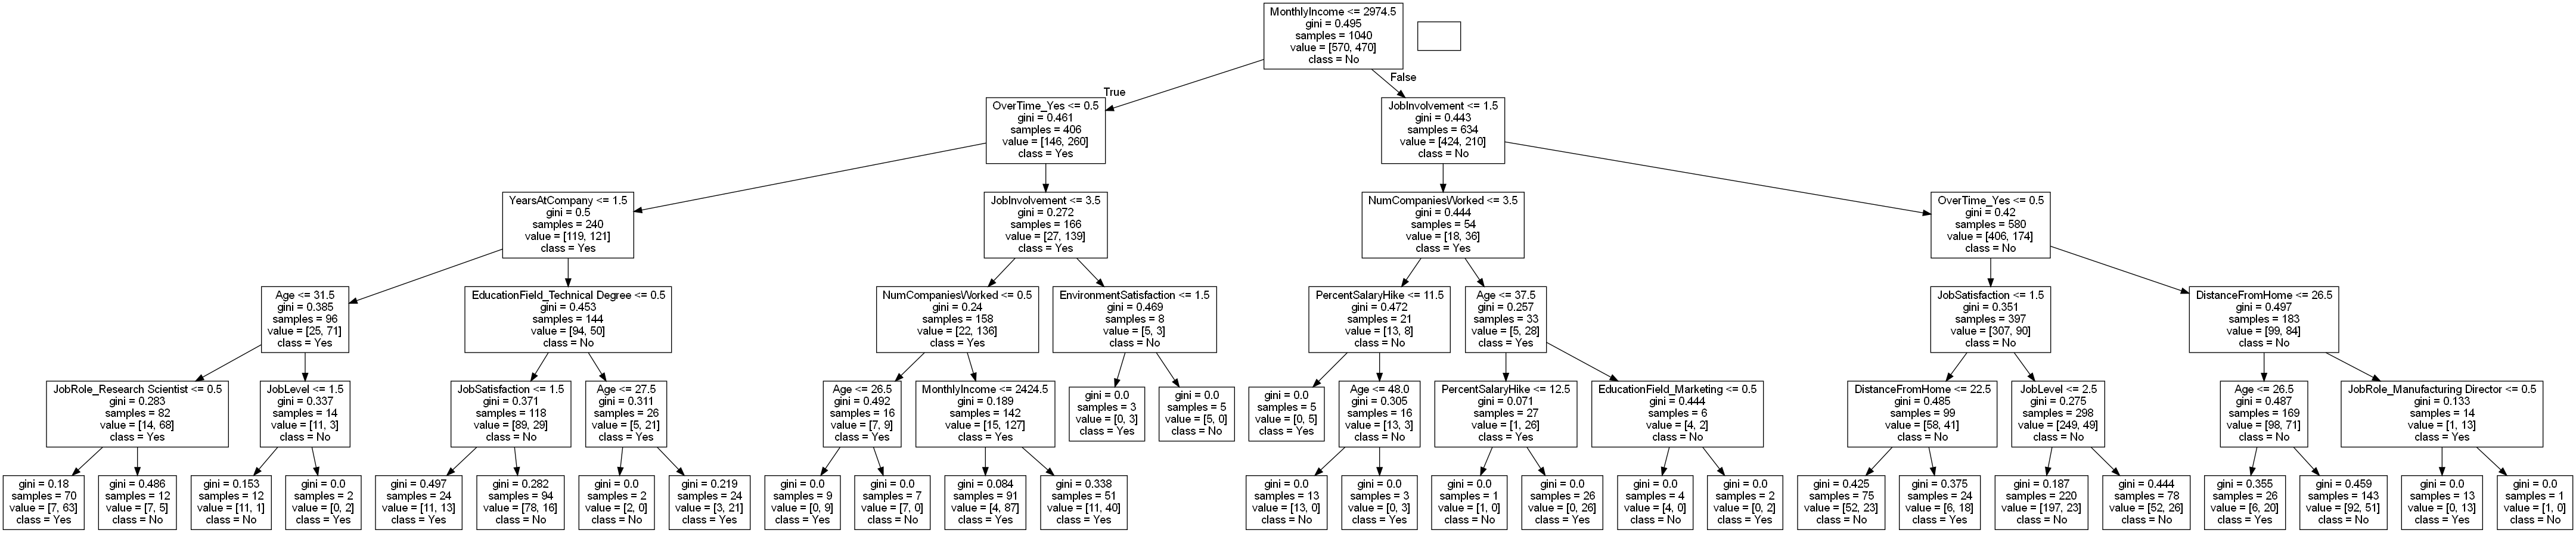

In [71]:
# type your code here
decision_tree_classification = DecisionTreeClassifier(max_depth=5,random_state=10)
dt_model = decision_tree_classification.fit(X_train, y_train)
feat_names = X_train.columns
dot_data = tree.export_graphviz(dt_model, feature_names = feat_names, class_names = ["No","Yes"])  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [72]:
# type your code here
decision_tree_model = DecisionTreeClassifier(random_state=10)
kf=KFold(n_splits=10,shuffle=True,random_state=0)
scores = cross_val_score(estimator = decision_tree_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = kf, 
                         scoring = 'roc_auc')
print("Mean accuracy after 10 fold cross validation: ", round(scores.mean(), 2))

Mean accuracy after 10 fold cross validation:  0.89


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [73]:
# type your code here
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10)}]
decision_tree_model = DecisionTreeClassifier(random_state = 10)
tree_grid = GridSearchCV(estimator = decision_tree_model, 
                         param_grid = hyp_paramaters, 
                         cv = 5)
tree_grid.fit(X_train, y_train)

decision_tree_tuned_model = DecisionTreeClassifier(criterion = tree_grid.best_params_['criterion'], 
                                                   max_depth = tree_grid.best_params_['max_depth'], 
                                                   min_samples_split = tree_grid.best_params_['min_samples_split'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
# type your code here
kf=KFold(n_splits=10,shuffle=True,random_state=0)
scores = cross_val_score(estimator = decision_tree_tuned_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = kf, 
                         scoring = 'roc_auc')
print("Mean ROC-AUC score after 10 fold cross validation: ", round(scores.mean(), 2))


Mean ROC-AUC score after 10 fold cross validation:  0.88


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build 5 decision trees each with 20 random features. Also predict the attrition for test set for each model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [75]:
# type your code here
columns = list(X_train.columns)
random.choices(columns, k=20)
sample_features = random.choices(columns, k=20)
dt_model_1 = DecisionTreeClassifier(random_state = 10)
dt_model_1 = dt_model_1.fit(X_train[sample_features], y_train)
y_pred_1 = dt_model_1.predict(X_test[sample_features])

sample_features = random.choices(columns, k=20)
dt_model_2 = DecisionTreeClassifier(random_state = 10)
dt_model_2 = dt_model_2.fit(X_train[sample_features], y_train)
y_pred_2 = dt_model_2.predict(X_test[sample_features])

sample_features = random.choices(columns, k=20)
dt_model_3 = DecisionTreeClassifier(random_state = 10)
dt_model_3 = dt_model_3.fit(X_train[sample_features], y_train)
y_pred_3 = dt_model_3.predict(X_test[sample_features])

sample_features = random.choices(columns, k=20)
dt_model_4 = DecisionTreeClassifier(random_state = 10)
dt_model_4 = dt_model_4.fit(X_train[sample_features], y_train)
y_pred_4 = dt_model_4.predict(X_test[sample_features])

sample_features = random.choices(columns, k=20)
dt_model_5 = DecisionTreeClassifier(random_state = 10)
dt_model_5 = dt_model_5.fit(X_train[sample_features], y_train)
y_pred_5 = dt_model_5.predict(X_test[sample_features])

model_predictions_df = pd.DataFrame({"y_pred_1": y_pred_1, 
                                     "y_pred_2": y_pred_2,
                                     "y_pred_3": y_pred_3,
                                     "y_pred_4": y_pred_4,
                                     "y_pred_5": y_pred_5})
model_predictions_df.head()

,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5
0,0,0,0,0,0
1,1,0,1,1,0
2,1,1,1,1,1
3,1,0,1,0,0
4,0,0,0,0,0


In [76]:
model_predictions_df.iloc[3].value_counts().index[0]

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Create a new dataframe "model_predictions_df" by appending each prediction made in question 8. There will be 5 columns in the dataframe for each prediction using the decision tree models built in above question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [77]:
# type your code here
# empty list to store the votes result 
votes = []

# for loop to find the maximum occuring values from each row and append it to the list "votes"
for i in range(model_predictions_df.shape[0]):
    votes.append(model_predictions_df.iloc[i].value_counts().index[0])
    
# create a column "Voted_Result" and store the votes
model_predictions_df['Voted_Result'] = votes

model_predictions_df.head()

,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,Voted_Result
0,0,0,0,0,0,0
1,1,0,1,1,0,1
2,1,1,1,1,1,1
3,1,0,1,0,0,0
4,0,0,0,0,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a new column "Voted_Result" in the dataframe "model_predictions_df" that contains the maximum occuring value (mode) of the 5 columns in the dataframe (row-wise).<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
# type your code here
# store the voted result in the variable y_pred_voted
y_pred_voted = model_predictions_df['Voted_Result']

# print the roc-auc score 
print("The ROC-AUC Score is: ", roc_auc_score(y_test, y_pred_voted))

# print the accuracy
print("The Accuracy is: ", accuracy_score(y_test, y_pred_voted))


The ROC-AUC Score is:  0.9422913719943423
The Accuracy is:  0.9395973154362416


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Consider the values of "Voted_Result" as our new predictions and store its values in a variable "new_y_pred" and find the accuracy and the roc-auc score using new_y_pred.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [94]:
# type your code here
# store the voted result in the variable y_pred_voted
y_pred_voted = model_predictions_df['Voted_Result']

# print the roc-auc score 
print("The ROC-AUC Score is: ", roc_auc_score(y_test, y_pred_voted))

# print the accuracy
print("The Accuracy is: ", accuracy_score(y_test, y_pred_voted))


The ROC-AUC Score is:  0.9421600323297635
The Accuracy is:  0.941834451901566


<a id="rf"> </a>
## 2. Random Forest

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a random forest full model to predict if an employee will leave the company or not and generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [95]:
# type your code here
rf_classification = RandomForestClassifier(n_estimators = 10,random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       245
           1       0.91      0.95      0.93       202

    accuracy                           0.94       447
   macro avg       0.94      0.94      0.94       447
weighted avg       0.94      0.94      0.94       447



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. For a random forest model, find the best value of hyperparameters "n_estimators", "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    criterion = ['entropy', 'gini'],
    n_estimators = [90, 100, 150, 200],
    max_depth = [10, 15, 20],
    min_samples_split = [2, 5, 8]

In [97]:
# type your code here
hyp_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [90, 100, 150, 200],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

kf=KFold(n_splits=5,shuffle=True,random_state=0)
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = hyp_paramaters, 
                       cv = kf,scoring='roc_auc')
rf_model = rf_grid.fit(X_train, y_train)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [98]:
# type your code here
random_forest_tuned_model = RandomForestClassifier(criterion = rf_model.best_params_['criterion'], 
                                                   max_depth = rf_model.best_params_['max_depth'], 
                                                   min_samples_split = rf_model.best_params_['min_samples_split'], 
                                                   n_estimators = rf_model.best_params_['n_estimators'],
                                                   random_state = 10)


kf=KFold(n_splits=10,shuffle=True,random_state=0)
scores = cross_val_score(estimator = random_forest_tuned_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = kf, 
                         scoring = 'roc_auc')


print("Mean ROC-AUC score after 10 fold cross validation: ", round(scores.mean(), 2))


Mean ROC-AUC score after 10 fold cross validation:  0.99


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Using the tuned random forest model, find the features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

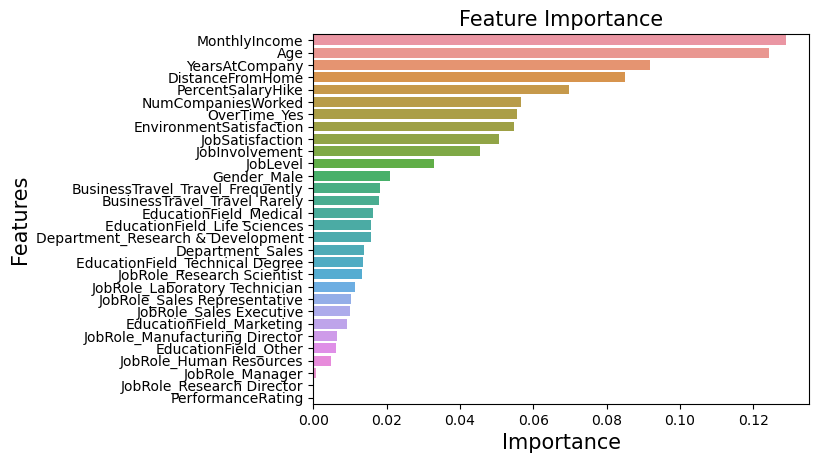

In [102]:
# type your code here
random_forest_tuned_model = RandomForestClassifier(criterion = rf_model.best_params_['criterion'], 
                                                   max_depth = rf_model.best_params_['max_depth'], 
                                                   min_samples_split = rf_model.best_params_['min_samples_split'], 
                                                   n_estimators = rf_model.best_params_['n_estimators'],
                                                   random_state = 10)


random_forest_tuned_model = random_forest_tuned_model.fit(X_train, y_train)
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': random_forest_tuned_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Build a random forest model using the top 10 most important features.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [103]:
# type your code here
important_columns = list(important_features['Features'].iloc[:10])

random_forest_tuned_model = RandomForestClassifier(criterion = rf_model.best_params_['criterion'], 
                                                   max_depth = rf_model.best_params_['max_depth'], 
                                                   min_samples_split = rf_model.best_params_['min_samples_split'], 
                                                   n_estimators = rf_model.best_params_['n_estimators'],
                                                   random_state = 10)

random_forest_tuned_model = random_forest_tuned_model.fit(X_train[important_columns], y_train)

y_pred = random_forest_tuned_model.predict(X_test[important_columns])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Plot a confusion matrix and area under the receiver operating characteristic curve for the model built in question 19. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

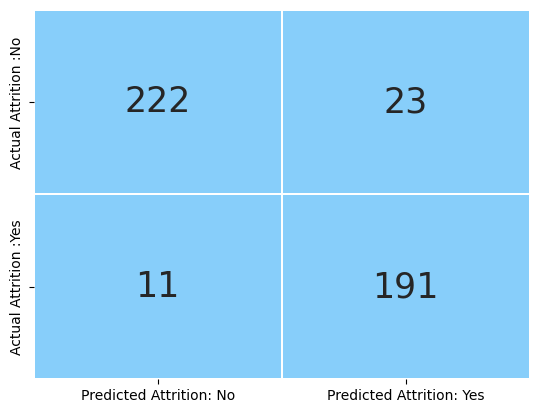

In [104]:
# type your code here
cm = confusion_matrix(y_test, y_pred)


conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Attrition: No','Predicted Attrition: Yes'], 
                           index = ['Actual Attrition :No','Actual Attrition :Yes'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)

# display the plot
plt.show()

In [105]:
191/210

0.9095238095238095

In [106]:
222/245

0.9061224489795918

In [107]:
y_test.value_counts()

0    245
1    202
Name: Attrition, dtype: int64